In [1]:
# imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

## Loading Data

In [2]:
# Load Data - Fix Column names , rmove any special character 
# Users Data
Usercolumns = ['UserID', 'Location', 'Age']
users_df = pd.read_csv('Data/BX-Users.csv',sep=';', encoding='latin-1')
users_df.columns = Usercolumns
print(users_df.columns)

# Books Data
Bookcolumns = ['ISBN', 'BookTitle', 'BookAuthor', 'YearOfPublication', 'Publisher',
       'ImageURLS', 'ImageURLM', 'ImageURLL']
books_df = pd.read_csv('Data/BX-Books.csv' , sep=';', encoding='latin-1', error_bad_lines=False)
books_df.columns = Bookcolumns
print(books_df.columns)
# Ratings Data
RatingsColumns = ["UserID","ISBN","BookRating"]
ratings_df = pd.read_csv('Data/BX-Book-Ratings.csv' , sep=';', encoding='latin-1', error_bad_lines=False)
ratings_df.columns = RatingsColumns
print(ratings_df.columns)

Index(['UserID', 'Location', 'Age'], dtype='object')


b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'


Index(['ISBN', 'BookTitle', 'BookAuthor', 'YearOfPublication', 'Publisher',
       'ImageURLS', 'ImageURLM', 'ImageURLL'],
      dtype='object')
Index(['UserID', 'ISBN', 'BookRating'], dtype='object')


In [3]:
# Print Shapes.
print(" Users DataFrame shape " , users_df.shape)
print(" Books DataFrame shape " , books_df.shape)
print(" Ratings DataFrame shape " , ratings_df.shape)

 Users DataFrame shape  (278858, 3)
 Books DataFrame shape  (271360, 8)
 Ratings DataFrame shape  (1149780, 3)


## Data Wrangling

### Users Data :
####  - Age column contains NaN value, fill this with mean of Ages from 10 - 90
####  - Split the location information in to City , state and country . We may use in the analysis and Drop location column

In [4]:
# Lets Analyse Data in each Data Frame Independantly
users_df.head()

,UserID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [5]:
# Fill 
#sorted(users_df.loc[: ,'Age'].unique())
mean_age = np.mean(users_df.loc[(users_df['Age'] > 10) | (users_df['Age'] < 91),'Age'])
users_df.Age.fillna(mean_age,inplace=True)
users_df['Age'] = users_df.Age.astype(int)
users_df.loc[(users_df['Age'] == np.NaN)]

,UserID,Location,Age


In [6]:
# Split the location information in to City , state and country . We may use in the analysis
split_data = users_df["Location"].str.split(", ",3)
data = split_data.to_list()
new_df = pd.DataFrame(data)

users_df["City"] = new_df[0]
users_df["State"] = new_df[1]
users_df["Country"] = new_df[2]

users_df.drop(['Location'], axis=1,inplace=True)
users_df.head(10)

,UserID,Age,City,State,Country
0,1,34,nyc,new york,usa
1,2,18,stockton,california,usa
2,3,34,moscow,yukon territory,russia
3,4,17,porto,v.n.gaia,portugal
4,5,34,farnborough,hants,united kingdom
5,6,61,santa monica,california,usa
6,7,34,washington,dc,usa
7,8,34,timmins,ontario,canada
8,9,34,germantown,tennessee,usa
9,10,26,albacete,wisconsin,spain


### Books Data :
####  - We dont need URLs for data Analysis Lets drop them.
####  - YearOfPublication contains some invalid entries should fix it.
####  - There are many entried with Year-Of-Publication as 0 - is invalid, hence i will replace these values with mean of the values.
####  - in Publisher column change NaN entries to "Other"

In [7]:
# Above We see that some columns are dropped as there were errors.

# We dont need URLs for data Analysis Lets drop them.
books_df.drop(columns=['ImageURLS','ImageURLM' , 'ImageURLL'], axis=1, inplace=True)
books_df.head()

,ISBN,BookTitle,BookAuthor,YearOfPublication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [8]:
# Lets analyse Year-Publication

books_df['YearOfPublication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [9]:
# We can see some invalid years like 0 , 'DK Publishing Inc' , 'Gallimard' 
# Lets fix these issues and change this coloumn Data type to number
pd.set_option('display.max_colwidth', -1)
#print(books_df[books_df['Year-Of-Publication'] == 'DK Publishing Inc'])

#books_df.loc[books_df['Year-Of-Publication'] == 'DK Publishing Inc',:]
books_df.loc[209538]['BookTitle'] = "DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)"
books_df.loc[209538]['BookAuthor'] = "Michael Teitelbaum"
books_df.loc[209538]['YearOfPublication'] = "2000"
books_df.loc[209538]['Publisher'] = "DK Publishing Inc"

books_df.loc[221678]['BookTitle'] = "DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)"
books_df.loc[221678]['BookAuthor'] = "James Buckley"
books_df.loc[221678]['YearOfPublication'] = "2000"
books_df.loc[221678]['Publisher'] = "DK Publishing Inc"

books_df.loc[[209538,221678]]

,ISBN,BookTitle,BookAuthor,YearOfPublication,Publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)",Michael Teitelbaum,2000,DK Publishing Inc
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)",James Buckley,2000,DK Publishing Inc


In [10]:
pd.set_option('display.max_colwidth', -1)
#print(books_df[books_df['Year-Of-Publication'] == 'DK Publishing Inc'])

books_df.loc[220731]['BookTitle'] = "Peuple du ciel, suivi de 'Les Bergers"
books_df.loc[220731]['BookAuthor'] = "Jean-Marie Gustave Le"
books_df.loc[220731]['YearOfPublication'] = "2003"
books_df.loc[220731]['Publisher'] = "Gallimard"

books_df.loc[[220731]]

,ISBN,BookTitle,BookAuthor,YearOfPublication,Publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers",Jean-Marie Gustave Le,2003,Gallimard


In [11]:
books_df['YearOfPublication'] = pd.to_numeric(books_df['YearOfPublication'])

#books_df.dtypes

print(sorted(books_df['YearOfPublication'].unique()))

print(books_df[books_df['YearOfPublication'] == 0].count())

[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]
ISBN                 4618
BookTitle            4618
BookAuthor           4618
YearOfPublication    4618
Publisher            4618
dtype: int64


In [12]:
# There are many entried with Year-Of-Publication as 0 , which is invalid, hence i will replace these values with mean of the values.

books_df.loc[books_df['YearOfPublication'] == 0] = np.mean(books_df['YearOfPublication'])
books_df['YearOfPublication'] = books_df['YearOfPublication'].astype(int)
print(sorted(books_df['YearOfPublication'].unique()))

[1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


In [13]:
#print(books_df.loc[books_df['Publisher'].isna(),:])

# We can see some HTML encoded strings like &amp; in 4th row
books_df.loc[128890 : 'Publisher'] = 'Other' 
books_df.loc[129037 :'Publisher'] = 'Other' 

print(books_df.loc[books_df['Publisher'].isna(),:])

Empty DataFrame
Columns: [ISBN, BookTitle, BookAuthor, YearOfPublication, Publisher]
Index: []


### Ratings Data :
####  - In ratings check if the book and User exists in our users_df and books_df, else drop those records
####  - Some ratings are 0 in the BookRatings column which means those are implict ratings. We should use only explict ratings for recommendations.

In [14]:
# out these ratings check if the book and User exists in our users_df and books_df, retian on those records
''' Running below method to remove the users rating takes huge time , method below that is pretty fast'''
def KeepValidRatings(ratings_df) :
    cnt = 0;
    for i in range(len(ratings_df)) :
        if ratings_df.loc[i]['UserID'] not in list(users_df['UserID']) or ratings_df.loc[i]['ISBN'] not in list(books_df['ISBN']) :
            ratings_df.drop(index = i, axis=0,inplace=True)
            #print(ratings_df.loc[i ,'User-ID'])
            #print(ratings_df.loc[i]['User-ID'])
            cnt = cnt + 1
    print("Count : " + str(cnt) )


print(" Ratings shape ealier : ",  ratings_df.shape)

#users_df['UserID'] = users_df['User-ID']
#ratings_df['UserID'] = ratings_df['User-ID']

ratings_new = ratings_df[ratings_df.ISBN.isin(books_df.ISBN)]
ratings_df = ratings_new[ratings_new.UserID.isin(users_df.UserID)]

print( " Ratings shape After : " , ratings_df.shape)

ratings_df.head()

 Ratings shape ealier :  (1149780, 3)
 Ratings shape After :  (813587, 3)


,UserID,ISBN,BookRating
0,276725,034545104X,0
2,276727,0446520802,0
5,276733,2080674722,0
8,276744,038550120X,7
10,276746,0425115801,0


In [15]:
ratings_df.BookRating.unique()

array([ 0,  7,  9,  8,  6,  5, 10,  3,  4,  2,  1], dtype=int64)

In [16]:
# Ratings (`Book-Rating`) are either explicit, expressed on a scale from 1-10 (higher values denoting higher appreciation),
# or implicit, expressed by 0.
# Ratings are from 1 - 10 are explict ratings, we should use these for recommendations.

#ratings_0 = ratings_df.loc[ratings_df.BookRating == 0]
ratings_x = ratings_df.loc[ratings_df.BookRating != 0]

#ratings_df = ratings_df.loc[ratings_df.UserID.isin(ratings_x.UserID)]
ratings_df = ratings_x

ratings_df.reset_index()

,index,UserID,ISBN,BookRating
0,8,276744,038550120X,7
1,16,276747,0060517794,9
2,19,276747,0671537458,9
3,20,276747,0679776818,8
4,24,276748,0747558167,6
...,...,...,...,...
305576,1149771,276704,0743211383,7
305577,1149773,276704,0806917695,5
305578,1149775,276704,1563526298,9
305579,1149777,276709,0515107662,10


Now that We have cleaned up the users, books and ratings datasets.
Below are final Datasets we have for recommendations.

In [17]:
print("Users Dataset....")
print(users_df.head())
print("Books Dataset....")
print(books_df.head())
print("Ratings Dataset....")
print(ratings_df.head())

Users Dataset....
   UserID  Age         City            State         Country
0  1       34   nyc          new york         usa           
1  2       18   stockton     california       usa           
2  3       34   moscow       yukon territory  russia        
3  4       17   porto        v.n.gaia         portugal      
4  5       34   farnborough  hants            united kingdom
Books Dataset....
         ISBN  \
0  0195153448   
1  0002005018   
2  0060973129   
3  0374157065   
4  0393045218   

                                                                                            BookTitle  \
0  Classical Mythology                                                                                  
1  Clara Callan                                                                                         
2  Decision in Normandy                                                                                 
3  Flu: The Story of the Great Influenza Pandemic of 1918 and the Search fo

## Visulaizations

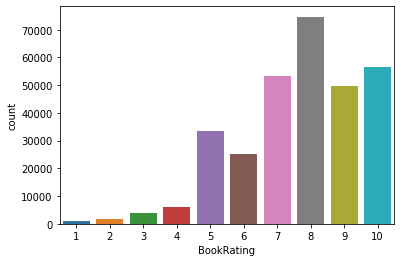

In [18]:
sns.countplot(ratings_df.BookRating)
plt.show()